In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('logs_df(ml).csv')

# Status Code

200     : 0

204     : 1
 
206     : 2

301     : 3

302     : 4

304     : 5

400     : 6

404     : 7 

405     : 8

500     : 9

In [3]:
error_code={301:0,400:1,200:2,404:3,302:4,405:5,206:6,204:7,304:8,500:9}

In [4]:
error=df['Host'][df['Status Code']<5].count()

In [5]:
total=df['Status Code'].count()

In [6]:
print('Percentage of Error Codes: ',(error/total)*100)

Percentage of Error Codes:  62.39539748953975


In [7]:
getMethod=df.Method[df.Method==4].count()

In [8]:
print('Percentage of GET Method: ',(getMethod/total)*100)

Percentage of GET Method:  60.442817294281724


In [9]:
postMethod=df.Method[df.Method==7].count()

In [10]:
print('Percentage of POST Method: ',(postMethod/total)*100)

Percentage of POST Method:  12.325662482566248


In [11]:
otherMethod=df.Method[(df.Method!=4) & (df.Method!=7)].count()

In [12]:
print('Percentage of others Method: ',(otherMethod/total)*100)

Percentage of others Method:  27.23152022315202


Text(0, 0.5, 'Count of Hosts')

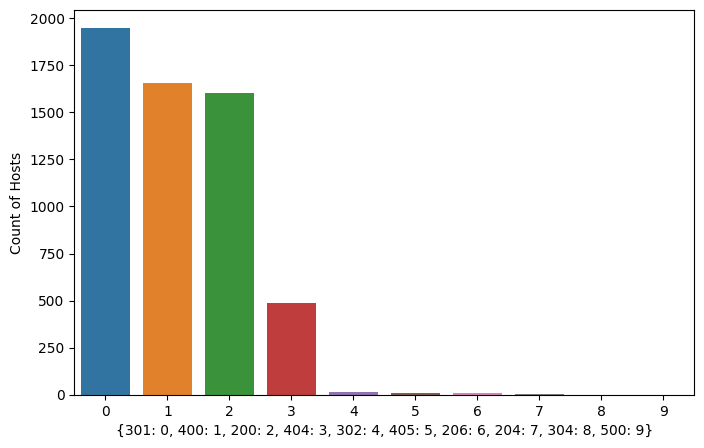

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(y=df['Status Code'].value_counts(),x=df['Status Code'].sort_values().unique())
plt.xlabel(error_code)
plt.ylabel('Count of Hosts')

In [14]:
df['Status Code'].value_counts()

3    1948
6    1658
0    1605
7     486
4      12
8      11
2      10
1       4
5       1
9       1
Name: Status Code, dtype: int64

In [15]:
df.corr()

/tmp/ipykernel_398/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Host    Method  Endpoint  Protocol  Status Code  \
Host            1.000000 -0.027162 -0.202051 -0.088086     0.072651   
Method         -0.027162  1.000000  0.219130  0.094475    -0.013879   
Endpoint       -0.202051  0.219130  1.000000  0.260901     0.200703   
Protocol       -0.088086  0.094475  0.260901  1.000000    -0.387554   
Status Code     0.072651 -0.013879  0.200703 -0.387554     1.000000   
Content Size   -0.095056 -0.012517  0.001979  0.080229    -0.279080   
No of Requests -0.016193 -0.094290  0.560743  0.091609     0.216262   

                Content Size  No of Requests  
Host               -0.095056       -0.016193  
Method             -0.012517       -0.094290  
Endpoint            0.001979        0.560743  
Protocol            0.080229        0.091609  
Status Code        -0.279080        0.216262  
Content Size        1.000000       -0.010287  
No of Requests     -0.010287        1.000000

In [16]:
df

Host        Date      Time  Method  Endpoint  Protocol  \
0     2415145644  2023-02-16  03:28:45       4       236         6   
1     2757421940  2023-02-16  04:11:34       4        10         6   
2     1123632510  2023-02-16  04:39:52       4       400         6   
3     1123632510  2023-02-16  04:39:52       4       177         6   
4     3118324652  2023-02-16  05:06:47       4        40         6   
...          ...         ...       ...     ...       ...       ...   
5731  2584535982  2023-02-19  02:48:08       7       240         6   
5732  2584535982  2023-02-19  02:48:10       4       240         6   
5733  2584535982  2023-02-19  02:48:12       7        10         6   
5734  2584535982  2023-02-19  02:48:13       7       240         6   
5735  3164952431  2023-02-19  03:06:29       4        10         6   

      Status Code  Content Size  No of Requests  
0               6         248.0              62  
1               0        5952.0               5  
2               7         146.0              20  
3               0         491.0              20  
4               7         548.0               1  
...           ...           ...             ...  
5731            7         146.0               6  
5732            7         146.0               6  
5733            8         150.0               6  
5734            7         146.0               6  
5735            0        5952.0               1  

[5736 rows x 9 columns]

In [17]:
t=df.Time[df.Host==3323217250].values

In [18]:
x=df.iloc[:,[3,5]].values

In [19]:
x

array([[4, 6],
       [4, 6],
       [4, 6],
       ...,
       [7, 6],
       [7, 6],
       [4, 6]])

# Creating Clusters using KMeans

/home/mav_27/Project/pro_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mav_27/Project/pro_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mav_27/Project/pro_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mav_27/Project/pro_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

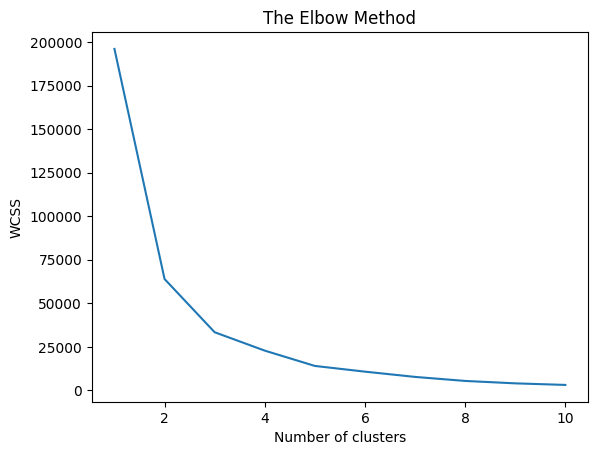

In [20]:
from sklearn.cluster import KMeans
import numpy as np
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

/home/mav_27/Project/pro_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


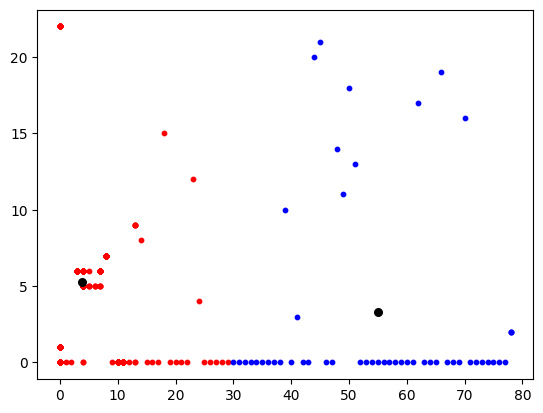

In [22]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')

As we can see using KMeans, forming the clusters is difficult,hence we are going to use a package pycaret which is used to detect anomalies and form a 3D Cluster

# Creating Clusters using pycaret package

In [23]:
from pycaret.anomaly import *

In [24]:
expo_ano=setup(data=df)

# Using model with Algo iForest

In [25]:
iforest=create_model('iforest')

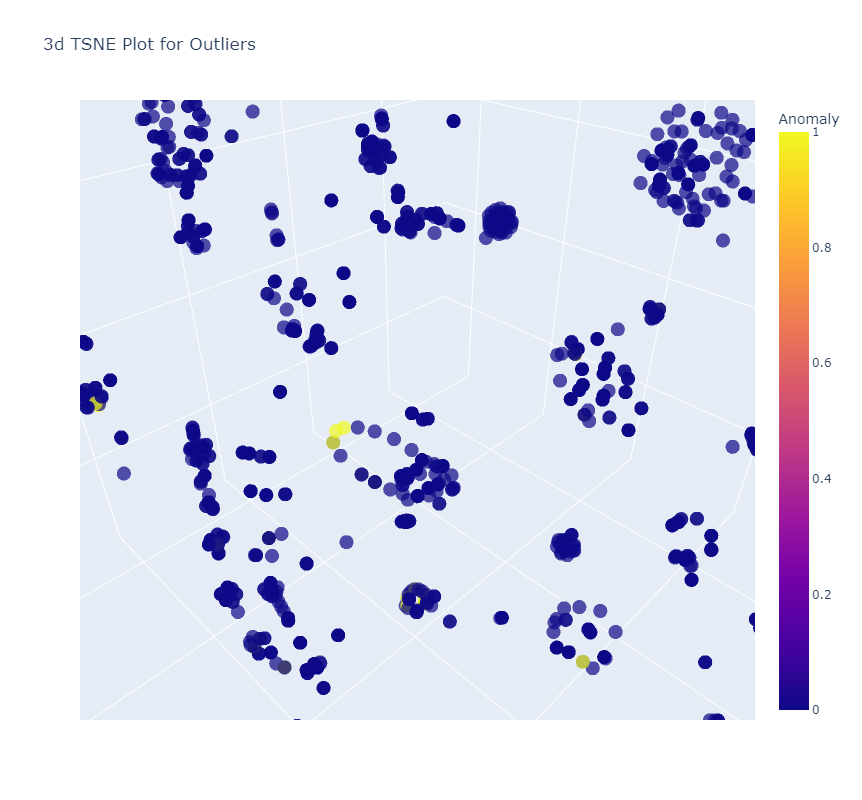

In [25]:
plot_model(iforest)

In [26]:
result=assign_model(iforest)

In [27]:
result.Anomaly.value_counts()

0    5454
1     282
Name: Anomaly, dtype: int64

In [28]:
result

Host        Date      Time  Method  Endpoint  Protocol  \
0     2415145644  2023-02-16  03:28:45       4       236         6   
1     2757421940  2023-02-16  04:11:34       4        10         6   
2     1123632510  2023-02-16  04:39:52       4       400         6   
3     1123632510  2023-02-16  04:39:52       4       177         6   
4     3118324652  2023-02-16  05:06:47       4        40         6   
...          ...         ...       ...     ...       ...       ...   
5731  2584535982  2023-02-19  02:48:08       7       240         6   
5732  2584535982  2023-02-19  02:48:10       4       240         6   
5733  2584535982  2023-02-19  02:48:12       7        10         6   
5734  2584535982  2023-02-19  02:48:13       7       240         6   
5735  3164952431  2023-02-19  03:06:29       4        10         6   

      Status Code  Content Size  No of Requests  Anomaly  Anomaly_Score  
0               6         248.0              62        0      -0.011158  
1               0        5952.0               5        0      -0.009765  
2               7         146.0              20        0      -0.005085  
3               0         491.0              20        0      -0.007089  
4               7         548.0               1        0      -0.010751  
...           ...           ...             ...      ...            ...  
5731            7         146.0               6        0      -0.009349  
5732            7         146.0               6        0      -0.009349  
5733            8         150.0               6        0      -0.006924  
5734            7         146.0               6        0      -0.009349  
5735            0        5952.0               1        0      -0.008362  

[5736 rows x 11 columns]

In [29]:
pd.DataFrame.to_csv(result,'first_result.csv',index=0)

In [30]:
models()

Name  \
ID                                             
abod            Angle-base Outlier Detection   
cluster       Clustering-Based Local Outlier   
cof         Connectivity-Based Local Outlier   
iforest                     Isolation Forest   
histogram  Histogram-based Outlier Detection   
knn             K-Nearest Neighbors Detector   
lof                     Local Outlier Factor   
svm                   One-class SVM detector   
pca             Principal Component Analysis   
mcd           Minimum Covariance Determinant   
sod               Subspace Outlier Detection   
sos             Stochastic Outlier Selection   

                                          Reference  
ID                                                   
abod                          pyod.models.abod.ABOD  
cluster                     pyod.models.cblof.CBLOF  
cof        pycaret.internal.patches.pyod.COFPatched  
iforest                 pyod.models.iforest.IForest  
histogram                     pyod.models.hbos.HBOS  
knn                             pyod.models.knn.KNN  
lof                             pyod.models.lof.LOF  
svm                         pyod.models.ocsvm.OCSVM  
pca                             pyod.models.pca.PCA  
mcd                             pyod.models.mcd.MCD  
sod        pycaret.internal.patches.pyod.SODPatched  
sos        pycaret.internal.patches.pyod.SOSPatched

# Using Cluster Model

In [31]:
dt=create_model('cluster')

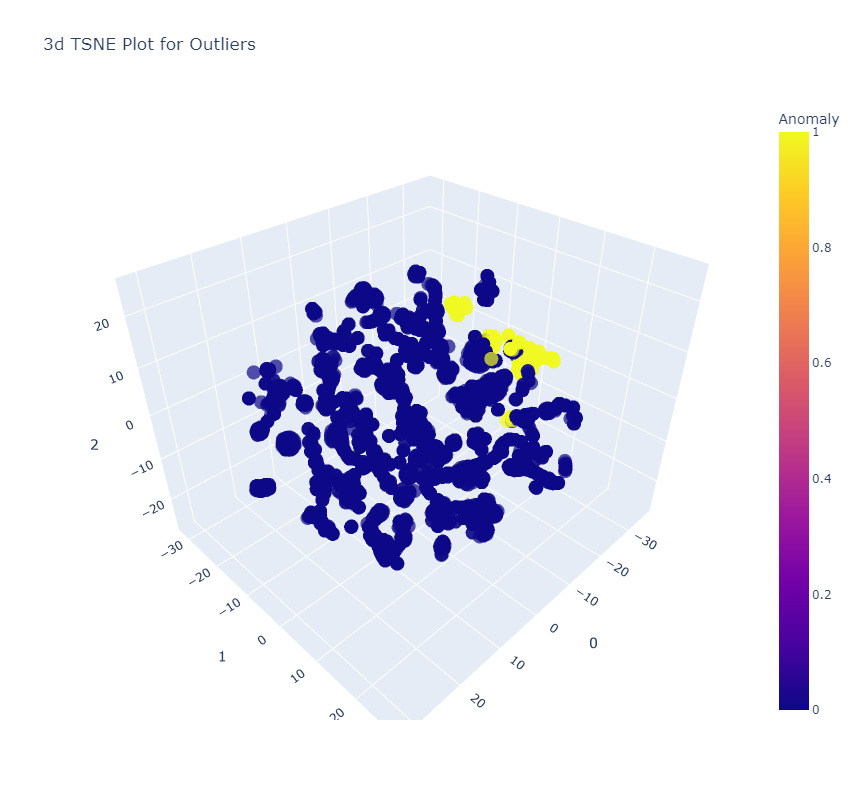

In [32]:
plot_model(dt)

In [33]:
result2=assign_model(dt)

In [34]:
result2

Host        Date      Time  Method  Endpoint  Protocol  \
0     2415145644  2023-02-16  03:28:45       4       236         6   
1     2757421940  2023-02-16  04:11:34       4        10         6   
2     1123632510  2023-02-16  04:39:52       4       400         6   
3     1123632510  2023-02-16  04:39:52       4       177         6   
4     3118324652  2023-02-16  05:06:47       4        40         6   
...          ...         ...       ...     ...       ...       ...   
5731  2584535982  2023-02-19  02:48:08       7       240         6   
5732  2584535982  2023-02-19  02:48:10       4       240         6   
5733  2584535982  2023-02-19  02:48:12       7        10         6   
5734  2584535982  2023-02-19  02:48:13       7       240         6   
5735  3164952431  2023-02-19  03:06:29       4        10         6   

      Status Code  Content Size  No of Requests  Anomaly  Anomaly_Score  
0               6         248.0              62        0   1.726190e+08  
1               0        5952.0               5        0   1.696573e+08  
2               7         146.0              20        0   6.466448e+07  
3               0         491.0              20        0   6.466448e+07  
4               7         548.0               1        0   5.668946e+07  
...           ...           ...             ...      ...            ...  
5731            7         146.0               6        0   3.228675e+06  
5732            7         146.0               6        0   3.228675e+06  
5733            8         150.0               6        0   3.228675e+06  
5734            7         146.0               6        0   3.228675e+06  
5735            0        5952.0               1        0   1.006168e+07  

[5736 rows x 11 columns]

In [35]:
pd.DataFrame.to_csv(result2,'second_result.csv',index=0)

In [36]:
result2.Anomaly.value_counts()

0    5449
1     287
Name: Anomaly, dtype: int64

In [37]:
save_model(iforest,'firstmodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Host', 'Method', 'Endpoint',
                                              'Protocol', 'Status Code',
                                              'Content Size', 'No of Requests'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Date', 'Time'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Date', 'Time'],
                                     transformer=OneHotEncoder(cols=['Date',
                                                                     'Time'],
                                                               handle_missing='return_nan',
                                                               use_ca

In [38]:
save_model(dt,'secondmodel',verbose=1)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Host', 'Method', 'Endpoint',
                                              'Protocol', 'Status Code',
                                              'Content Size', 'No of Requests'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Date', 'Time'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Date', 'Time'],
                                     transformer=OneHotEncoder(cols=['Date',
                                                                     'Time'],
                                                               handle_missing='return_nan',
                                                               use_ca

# Using KNN Model

In [39]:
knn=create_model('knn')

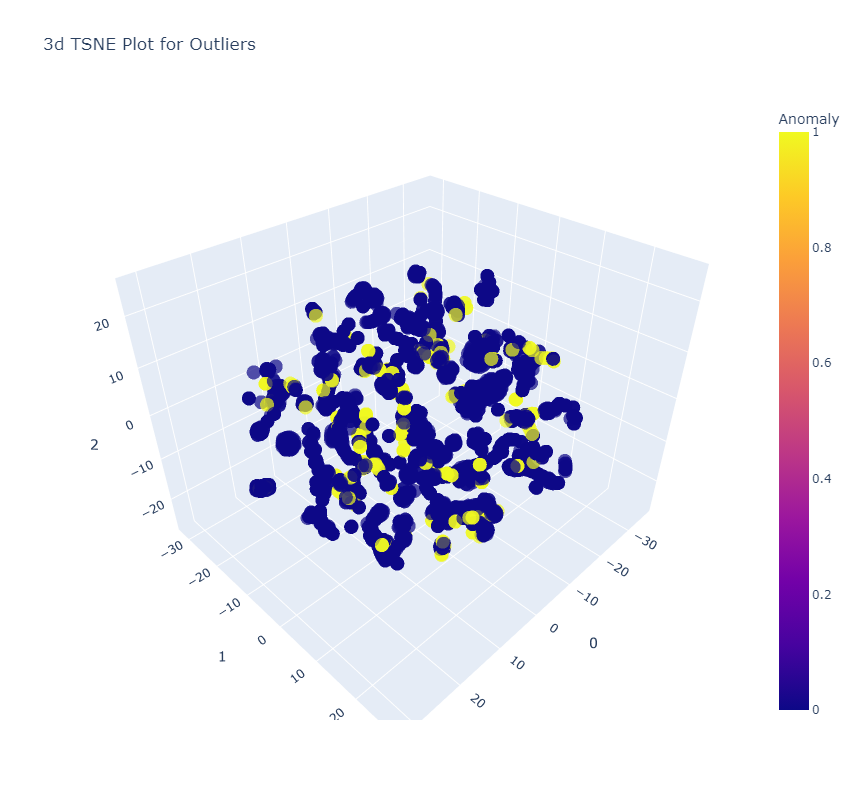

In [41]:
plot_model(knn)

In [42]:
result3=assign_model(knn)

In [43]:
result3

Host        Date      Time  Method  Endpoint  Protocol  \
0     2415145644  2023-02-16  03:28:45       4       236         6   
1     2757421940  2023-02-16  04:11:34       4        10         6   
2     1123632510  2023-02-16  04:39:52       4       400         6   
3     1123632510  2023-02-16  04:39:52       4       177         6   
4     3118324652  2023-02-16  05:06:47       4        40         6   
...          ...         ...       ...     ...       ...       ...   
5731  2584535982  2023-02-19  02:48:08       7       240         6   
5732  2584535982  2023-02-19  02:48:10       4       240         6   
5733  2584535982  2023-02-19  02:48:12       7        10         6   
5734  2584535982  2023-02-19  02:48:13       7       240         6   
5735  3164952431  2023-02-19  03:06:29       4        10         6   

      Status Code  Content Size  No of Requests  Anomaly  Anomaly_Score  
0               6         248.0              62        0       0.000000  
1               0        5952.0               5        0   14103.180918  
2               7         146.0              20        0     281.709070  
3               0         491.0              20        0     462.341865  
4               7         548.0               1        0  224907.432834  
...           ...           ...             ...      ...            ...  
5731            7         146.0               6        0     228.525710  
5732            7         146.0               6        0     228.525710  
5733            8         150.0               6        0     228.525710  
5734            7         146.0               6        0     228.525710  
5735            0        5952.0               1        0   87306.978782  

[5736 rows x 11 columns]

In [44]:
save_model(knn,'thirdmodel(anomaly)',verbose=1)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Host', 'Method', 'Endpoint',
                                              'Protocol', 'Status Code',
                                              'Content Size', 'No of Requests'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Date', 'Time'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Date', 'Time'],
                                     transformer=OneHotEncoder(cols=['Date',
                                                                     'Time'],
                                                               handle_missing='return_nan',
                                                               use_ca

In [45]:
pd.DataFrame.to_csv(result3,'third_result.csv',index=0)